In [121]:
from matplotlib import pyplot as plt
import os
import numpy as np
import json


file_dir = "/data03/sunyi/time_constrained_cot/outputs/1_24"
model_list = [
    "microsoft/Phi-3-medium-128k-instruct",
    "microsoft/Phi-3-small-128k-instruct",
    "microsoft/Phi-3-mini-128k-instruct",
]

In [122]:
PROMP_LIST = [ "-aav", "-c2f", "-sbs", "-direct", "-quick", "-aav-hard", "-c2f-hard", "-sbs-hard", "-direct-hard", "-quick-hard"]


MODEL_SERIES_MAP = {
    "Qwen/QwQ-32B-Preview": "qwen",
    "Qwen/Qwen2.5-32B-Instruct": "qwen",
    "Qwen/Qwen2.5-14B-Instruct": "qwen",
    "Qwen/Qwen2.5-7B-Instruct": "qwen",
    "Qwen/Qwen2.5-3B-Instruct": "qwen",
    "Qwen/Qwen2.5-1.5B-Instruct": "qwen",
    "google/gemma-2-2b-it": "gemma",
    "google/gemma-2-9b-it": "gemma",
    "google/gemma-2-27b-it": "gemma",
    "mistralai/Mathstral-7B-v0.1": "mistral",
    "mistralai/Ministral-8B-Instruct-2410": "mistral",
    "mistralai/Mistral-Nemo-Instruct-2407": "mistral",
    "mistralai/Mistral-Small-Instruct-2409": "mistral",
    "microsoft/phi-4": "phi4",
    "microsoft/Phi-3-medium-128k-instruct": "phi3medium",
    "microsoft/Phi-3-small-128k-instruct": "phi3small",
    "microsoft/Phi-3.5-mini-instruct": "phi3mini",
    "microsoft/Phi-3-mini-128k-instruct": "phi3mini",
}


MODEL_SERIES_PROMPT_TYPE_MAP = {
    "qwen": ["qwen" + prompt for prompt in PROMP_LIST],
    "mistral": ["mistral"+prompt for prompt in PROMP_LIST],
    "gemma": ["gemma"+prompt for prompt in PROMP_LIST],
    "phi3mini": ["phi3"+prompt for prompt in PROMP_LIST],
    "phi3small": ["phi3"+prompt for prompt in PROMP_LIST],
    "phi3medium": ["phi3"+prompt for prompt in PROMP_LIST],
    "phi4": ["phi4"+prompt for prompt in PROMP_LIST],
}

In [123]:
def gen_budget_list(budget, data_name, model):
    if budget < 0:
        return [-1]
    elif budget == 0:
        return [25]
    else:
        if model in ["Qwen/QwQ-32B-Preview", "Skywork/Skywork-o1-Open-Llama-3.1-8B", "PowerInfer/SmallThinker-3B-Preview"]:
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 2401, 50):
                    budget_list.append(i)
        else:    
            if data_name == "gsm8k":
                budget_list = []
                for i in range(25, 601, 25):
                    budget_list.append(i)
                # for i in range(600, 1001, 50):
                #     budget_list.append(i)
            elif data_name in ["math", "math500"]:
                budget_list = []
                for i in range(25, 600, 25):
                    budget_list.append(i)
                for i in range(600, 1201, 50):
                    budget_list.append(i)
        return budget_list

In [124]:
dataset = "gsm8k"
something = "_-1_seed0_t0.0_s0_e-1"

In [125]:
model_acc_dicts = {}

for model in model_list:
    model_acc_dict = {}
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        acc_list = []
        for budget in budget_list:
            file_name = "test_" + prompt_type + something + "_b" + str(int(budget)) + "_metrics.json"
            file_path = os.path.join(file_dir, model, prompt_type, dataset, file_name)
            with open(file_path, "r") as f:
                acc_list.append(json.load(f)["acc"])
        model_acc_dict[prompt_type] = acc_list
    model_acc_dicts[model] = model_acc_dict

model_acc_dicts

{'microsoft/Phi-3-medium-128k-instruct': {'phi3medium-aav': [12.4,
   16.0,
   18.0,
   21.0,
   22.4,
   25.0,
   27.6,
   28.2,
   32.6,
   33.2,
   36.4,
   36.4,
   37.4,
   38.6,
   39.8,
   41.2,
   40.8,
   41.6,
   41.8,
   41.4,
   41.4,
   41.8,
   41.8,
   42.2,
   41.8,
   41.8,
   42.4,
   42.4,
   42.6,
   43.0,
   42.6,
   42.8,
   42.8,
   42.4,
   42.8,
   42.8],
  'phi3medium-c2f': [11.0,
   11.4,
   15.8,
   16.6,
   19.0,
   21.6,
   23.4,
   25.2,
   26.6,
   29.8,
   35.2,
   34.6,
   37.8,
   40.6,
   39.2,
   40.8,
   42.6,
   43.6,
   43.6,
   43.8,
   44.2,
   44.8,
   45.0,
   45.0,
   45.2,
   45.6,
   45.6,
   45.6,
   45.6,
   45.6,
   45.8,
   45.8,
   45.8,
   45.8,
   45.8,
   45.8],
  'phi3medium-sbs': [7.4,
   9.8,
   11.8,
   17.2,
   19.4,
   25.0,
   26.2,
   31.0,
   33.4,
   38.4,
   40.4,
   41.8,
   42.4,
   44.0,
   45.0,
   47.4,
   47.4,
   47.8,
   49.6,
   49.0,
   49.8,
   50.4,
   50.4,
   50.8,
   50.6,
   51.2,
   51.0,
   51.2,
   51.

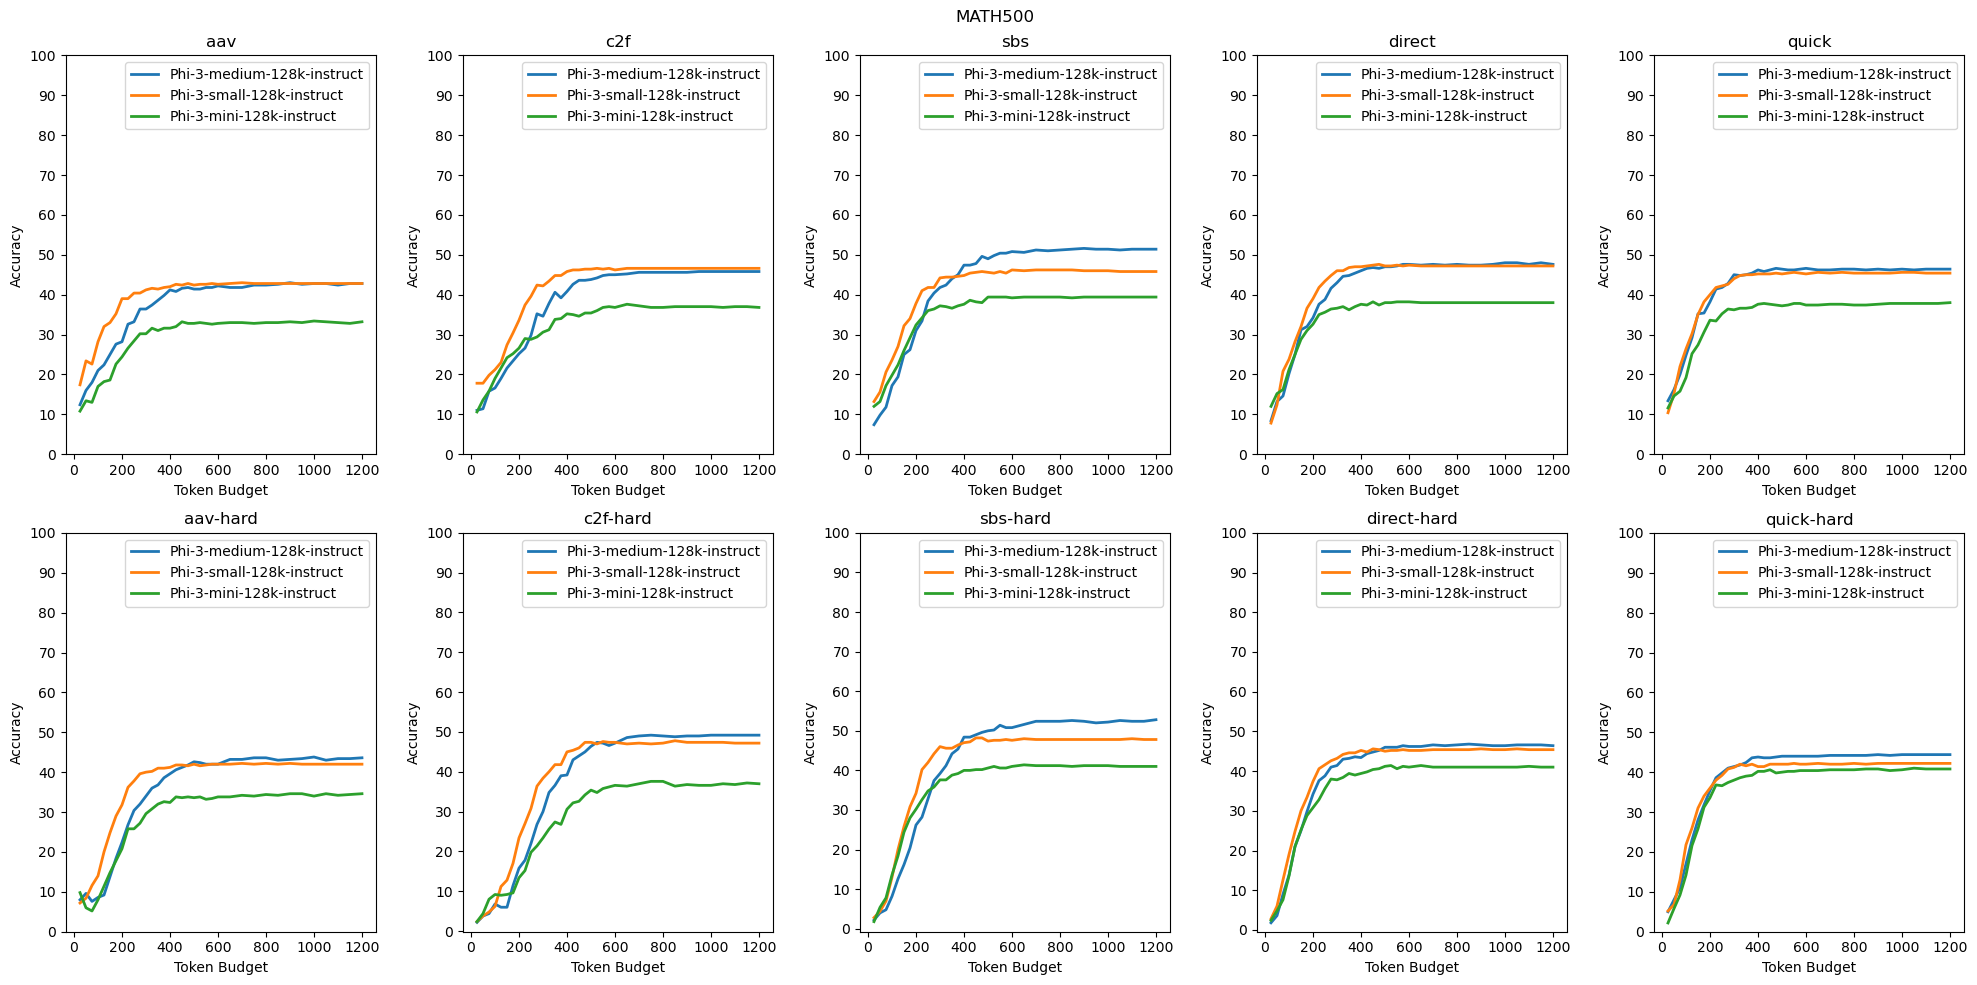

In [126]:
# Create 2x5 subplots for each prompt type
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for index, prompt_type in enumerate(PROMP_LIST):
    # Convert single index to row, col indices
    row = index // 5
    col = index % 5
    for model in model_list:
        axs[row, col].plot(budget_list, model_acc_dicts[model][MODEL_SERIES_MAP[model] + prompt_type], label=model.split("/")[-1], linewidth=2)
    axs[row, col].set_xlabel("Token Budget")
    axs[row, col].set_ylabel("Accuracy")
    axs[row, col].set_title(prompt_type[1:])
    axs[row, col].legend()
    axs[row, col].set_yticks(range(0, 101, 10))  # Set y-axis interval to 10
plt.suptitle(f"{dataset}".upper())
plt.tight_layout()  # Add tight_layout to prevent overlapping
plt.show()

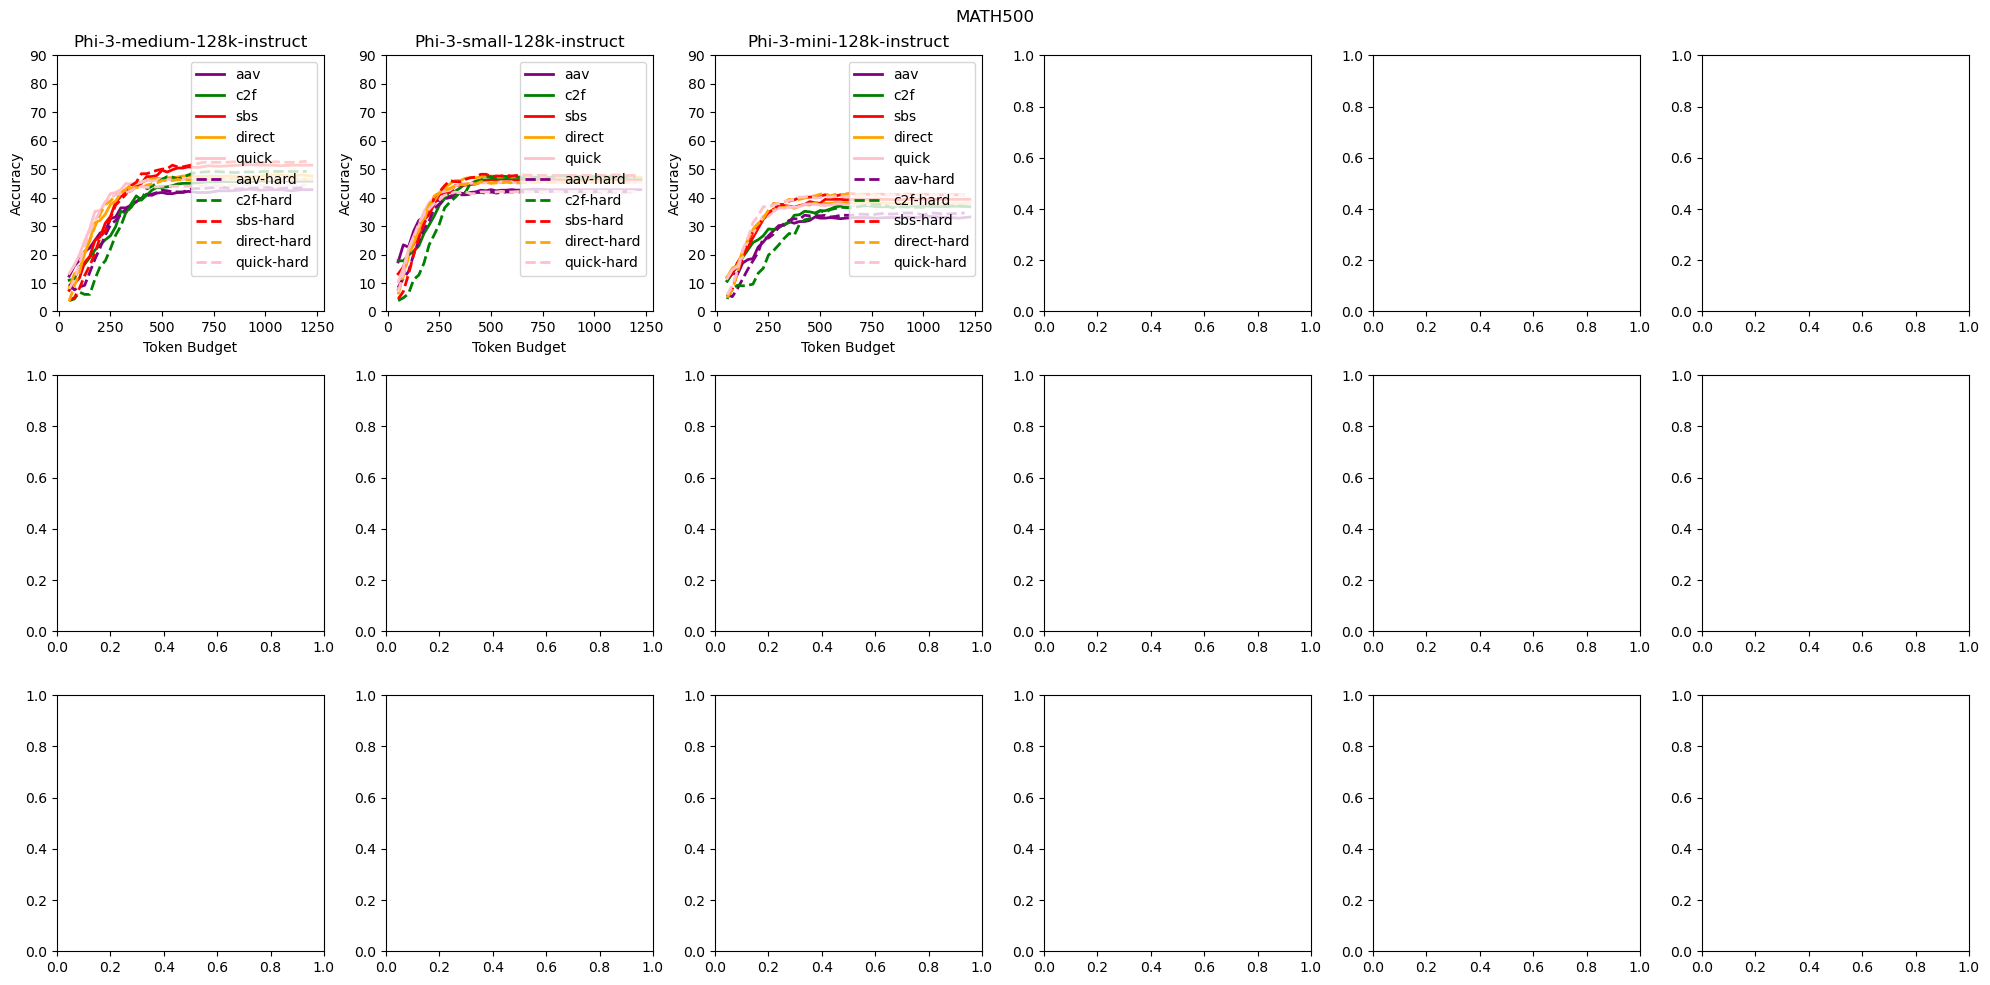

In [127]:
# Create a 2x3 subplot
fig, axs = plt.subplots(3, 6, figsize=(20, 10))
marker_size = 5  # Set the desired marker size
line_width = 2   # Set the desired line width

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot all lines first without labels
for index, model in enumerate(model_list):
    budget_list = gen_budget_list(1, dataset, model)
    model_prompt_list = MODEL_SERIES_PROMPT_TYPE_MAP[MODEL_SERIES_MAP[model]]
    for prompt_type in model_prompt_list:
        if "sbs-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
        elif "direct-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="orange", label="direct-hard", linewidth=line_width)
        elif "quick-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="pink", label="quick-hard", linewidth=line_width)
        elif "c2f-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
        elif "aav-hard" in prompt_type:
            axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
        elif "sbs" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
        elif "direct" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange", label="direct", linewidth=line_width)
        elif "quick" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="pink", label="quick", linewidth=line_width)
        elif "c2f" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
        # elif "kf" in prompt_type:
        #     axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="blue", label="kf", linewidth=line_width)
        elif "aav" in prompt_type:
            axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
        
        axs[index].set_xlabel("Token Budget")
        axs[index].set_ylabel("Accuracy")
        axs[index].set_title(f"{model.split('/')[-1]}")
        axs[index].legend()
        
        # Set y-axis and x-axis ticks
        axs[index].set_yticks(range(0, 91, 10))  # Set y-axis interval to 10
        # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50

# set the title
plt.suptitle(f"{dataset}".upper())
# Adjust layout
plt.tight_layout()

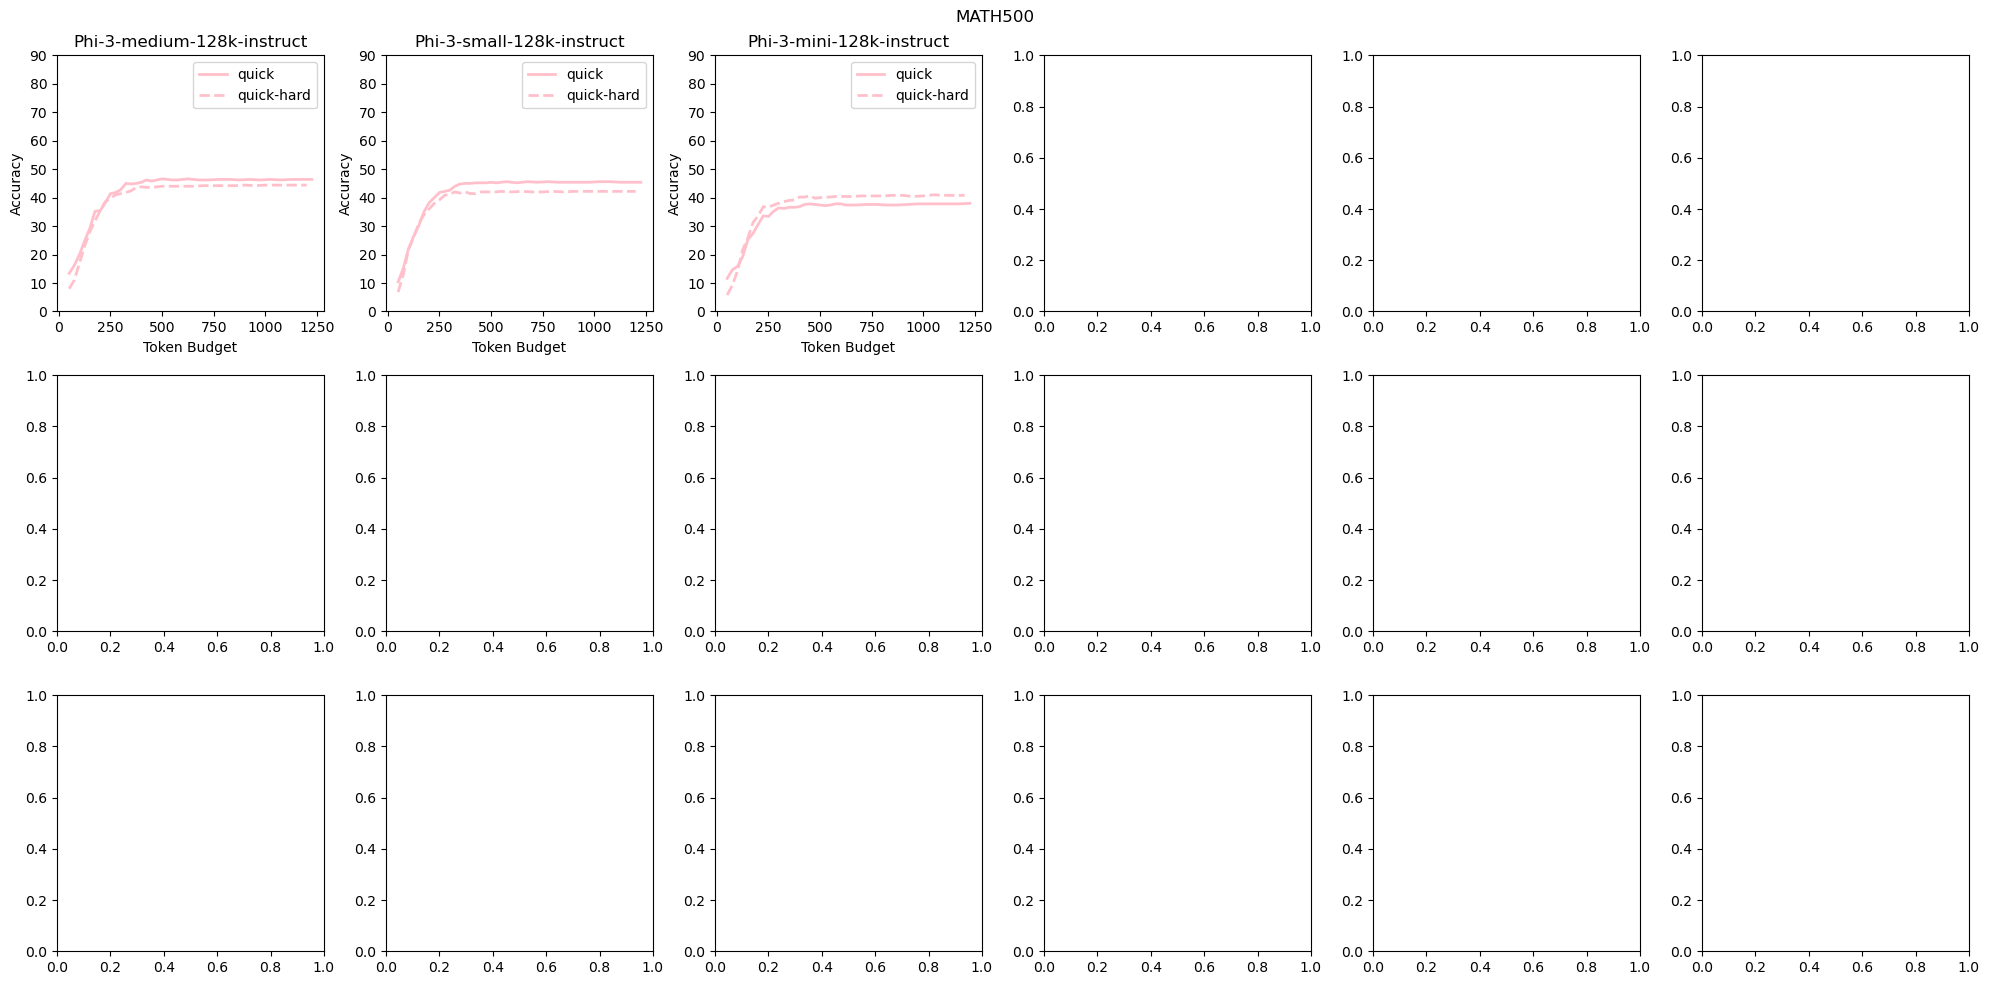

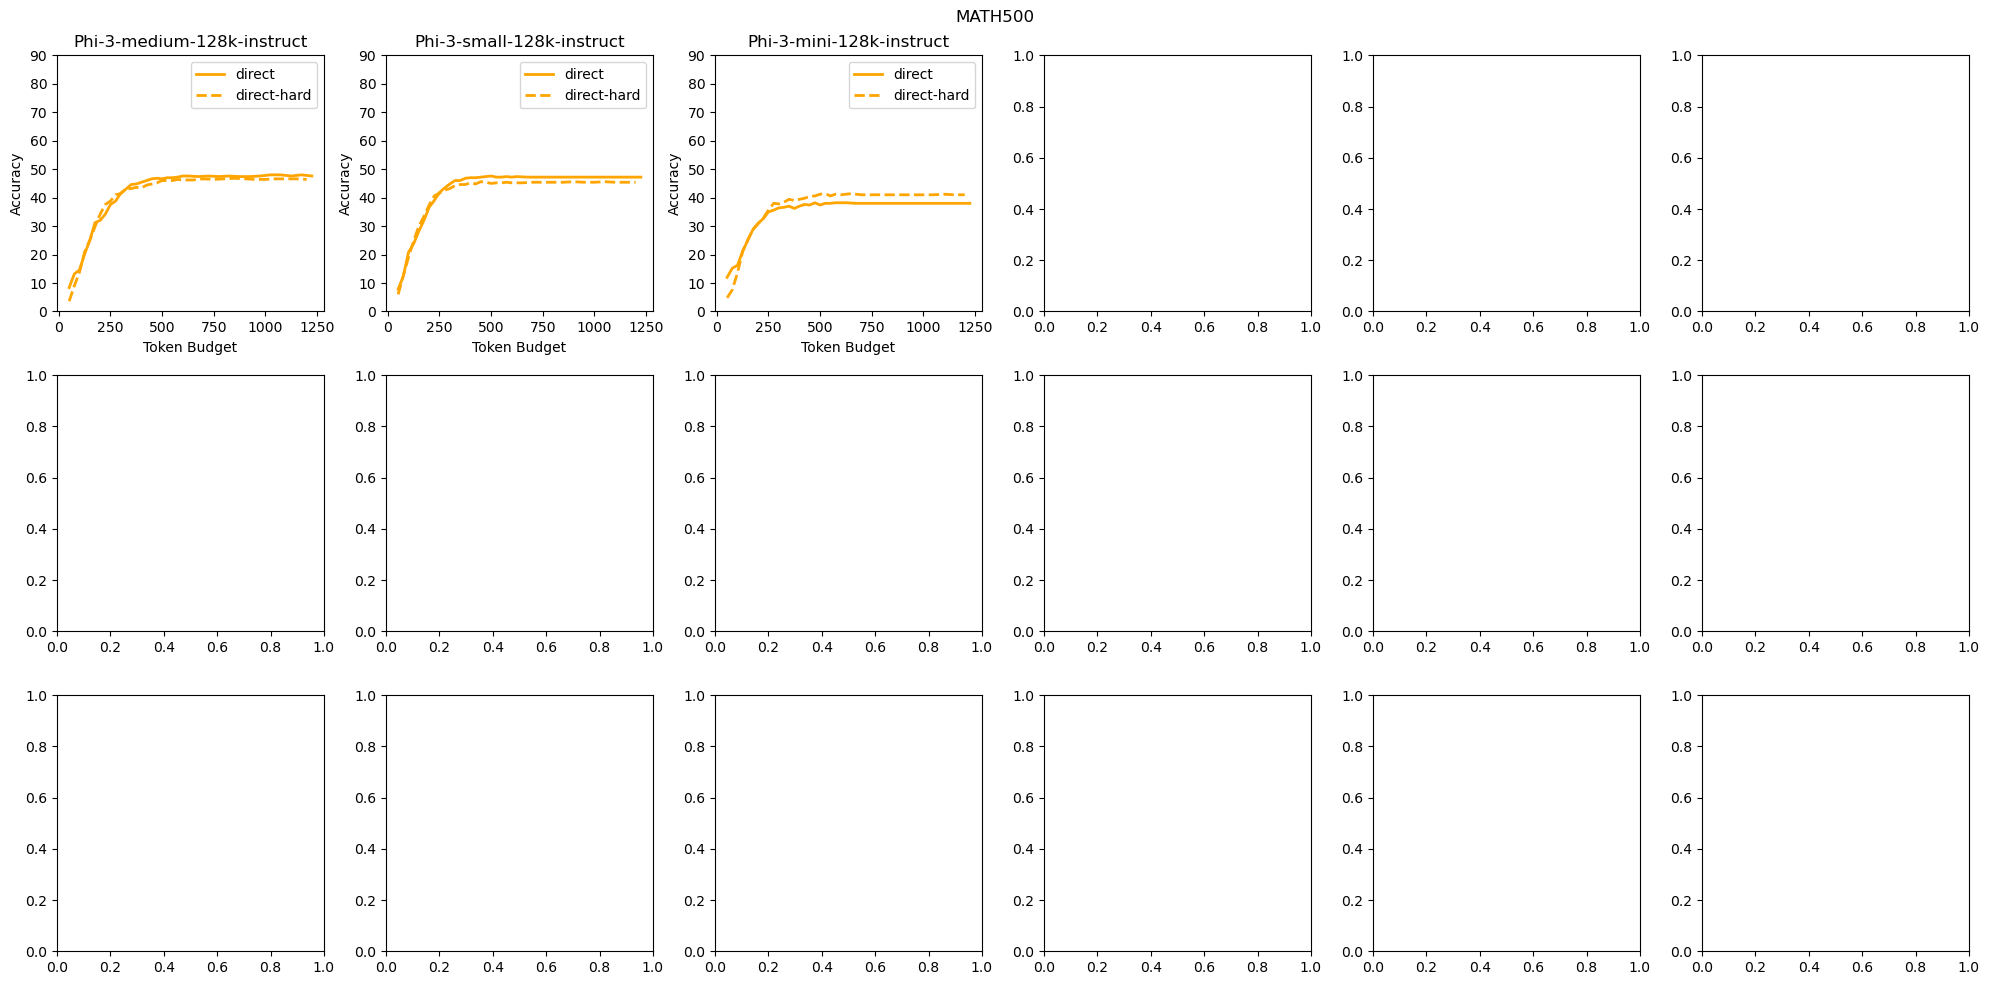

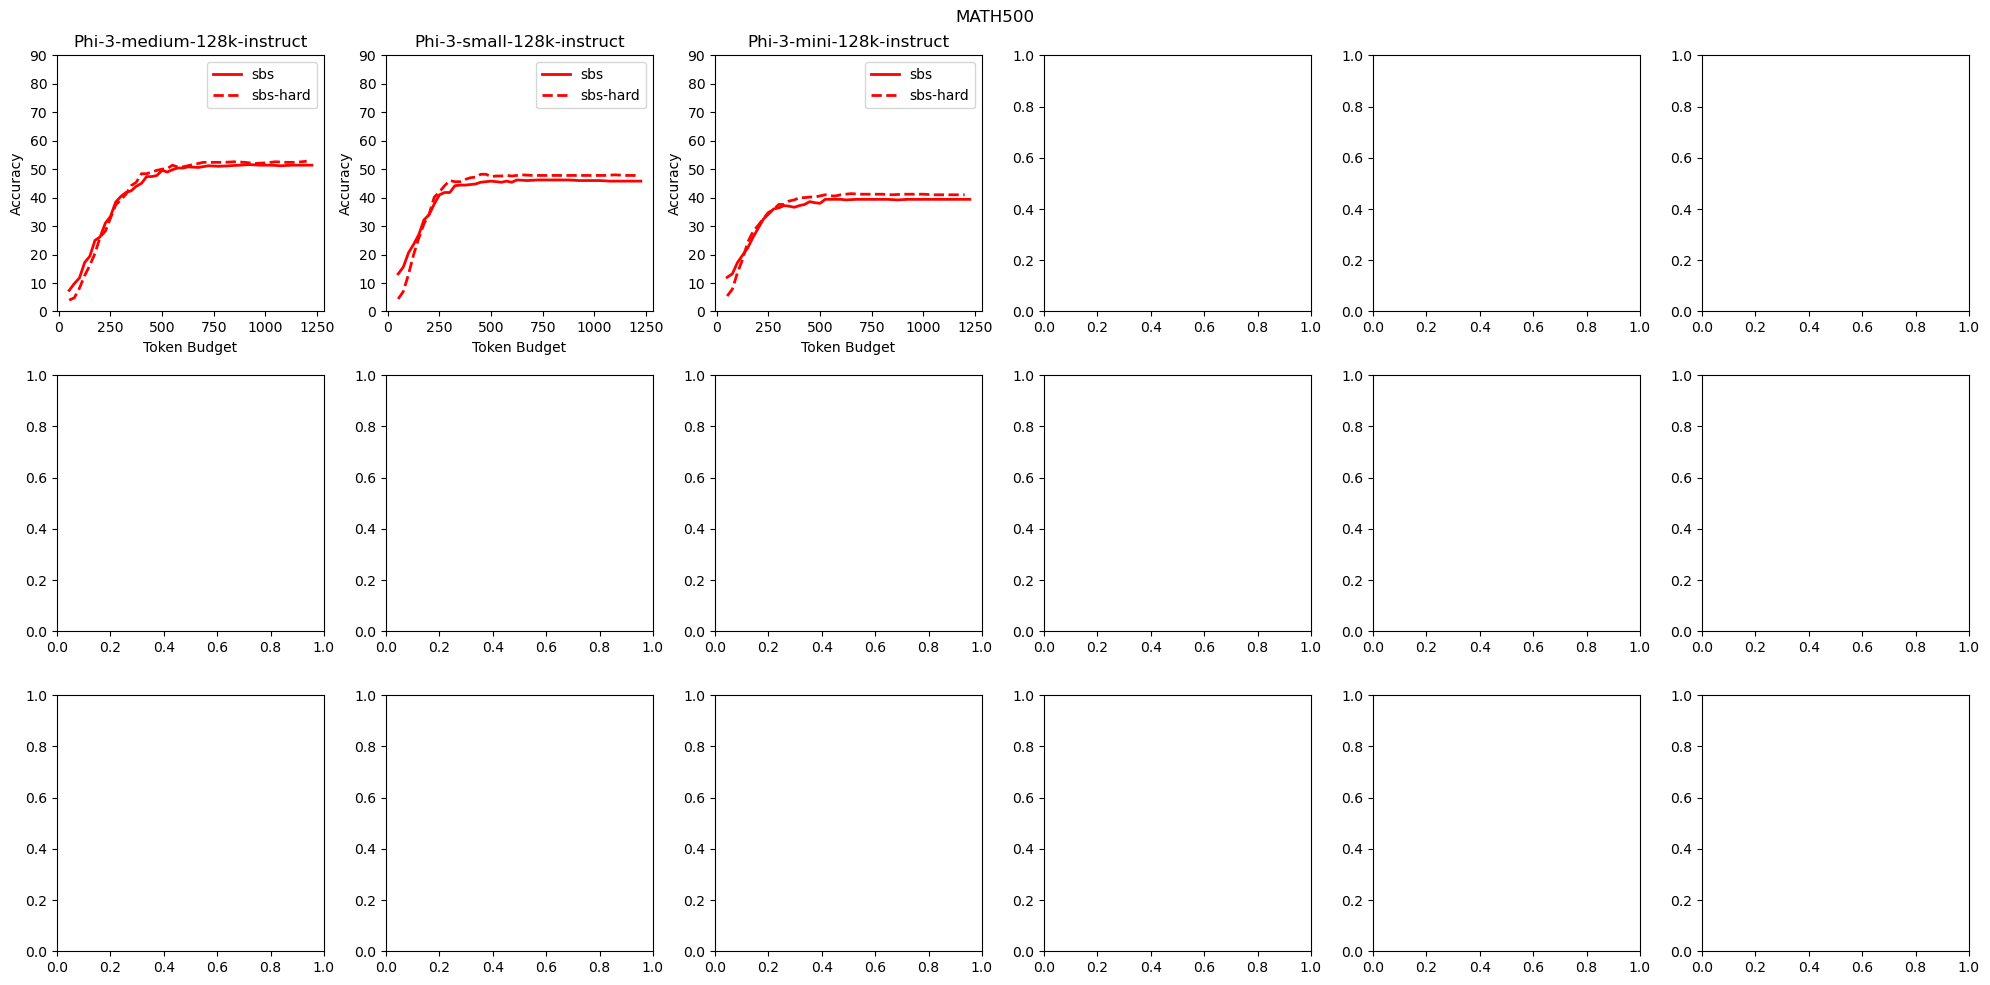

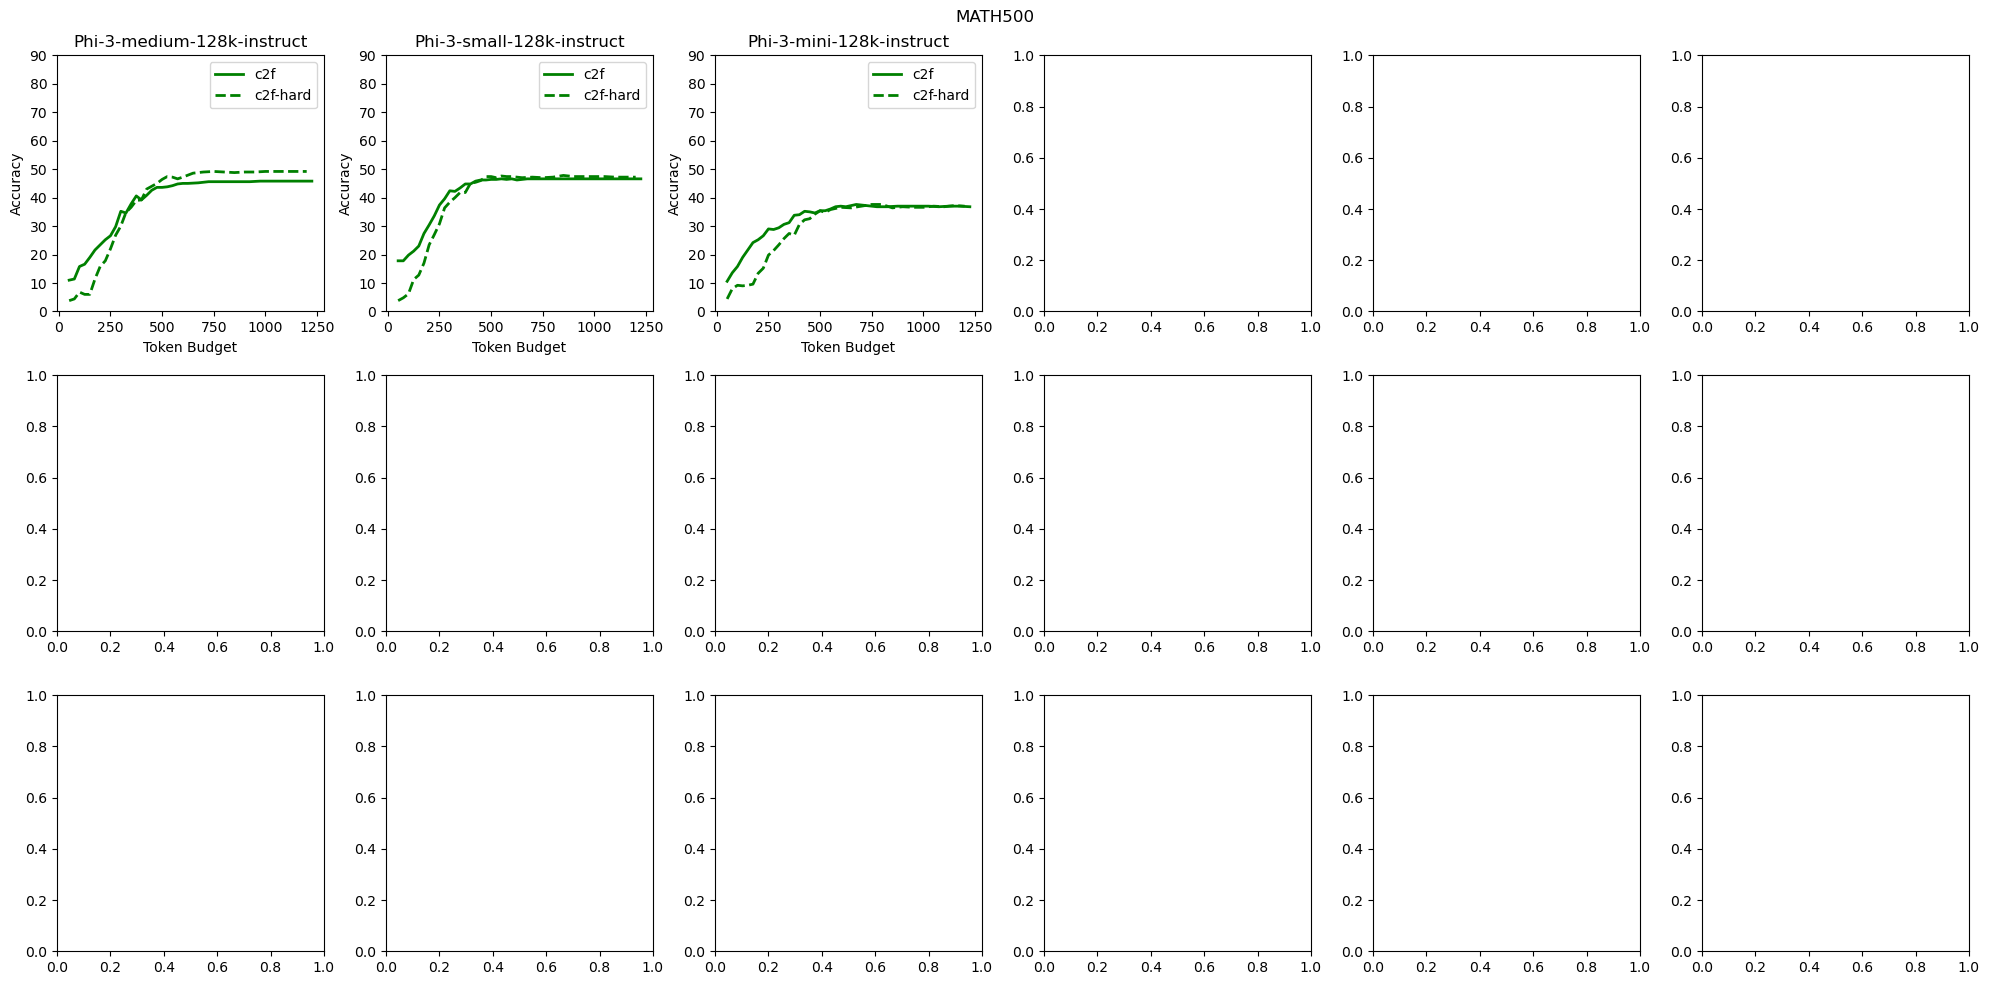

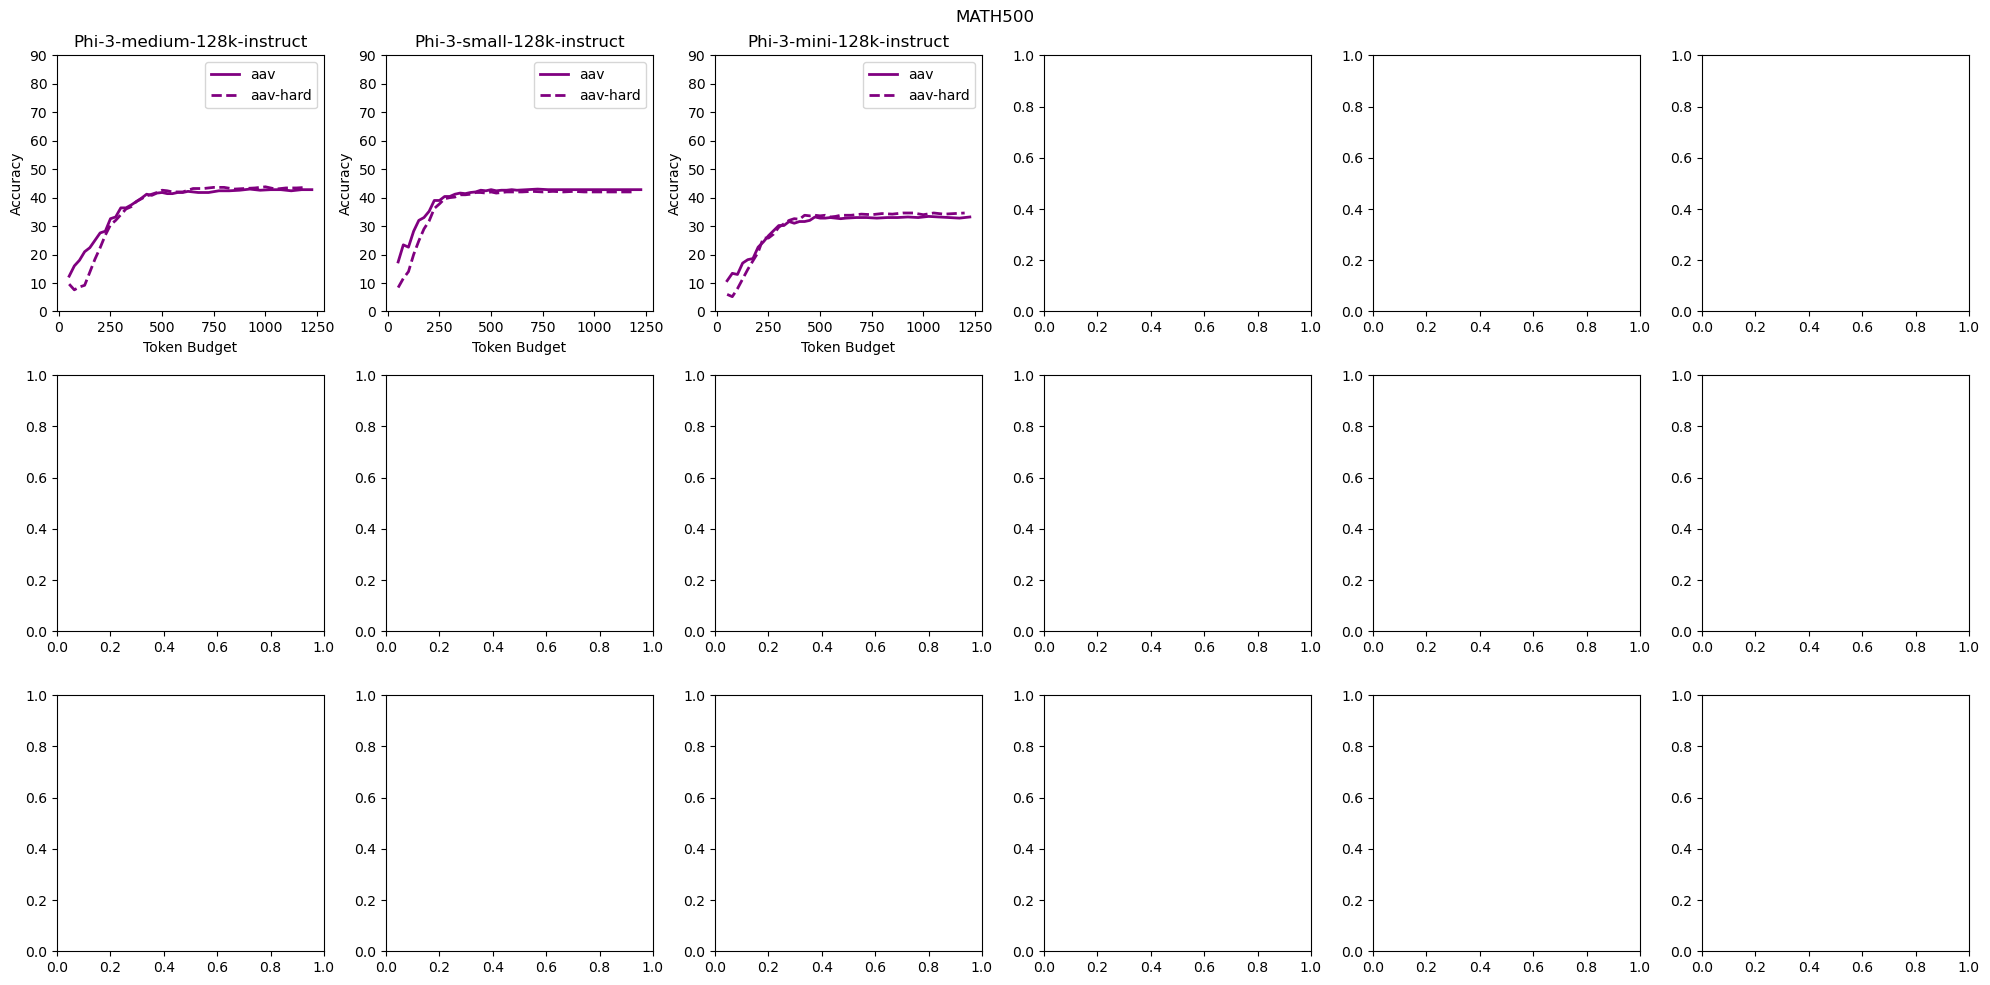

In [128]:
for prompt in ["-quick", "-direct", "-sbs", "-c2f", "-aav"]:
    
    
    # Create a 2x3 subplot
    fig, axs = plt.subplots(3, 6, figsize=(20, 10))
    marker_size = 5  # Set the desired marker size
    line_width = 2   # Set the desired line width

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    # Plot all lines first without labels
    for index, model in enumerate(model_list):
        budget_list = gen_budget_list(1, dataset, model)
        model_prompt_list = [MODEL_SERIES_MAP[model] + prompt, MODEL_SERIES_MAP[model] + prompt + "-hard"]
        for prompt_type in model_prompt_list:
            if "sbs-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="red", label="sbs-hard", linewidth=line_width)
            elif "direct-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="orange", label="direct-hard", linewidth=line_width)
            elif "quick-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="pink", label="quick-hard", linewidth=line_width)
            elif "c2f-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="green", label="c2f-hard", linewidth=line_width)
            elif "aav-hard" in prompt_type:
                axs[index].plot(budget_list[1:], model_acc_dicts[model][prompt_type][1:], linestyle='--', color="purple", label="aav-hard", linewidth=line_width)
            elif "sbs" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="red", label="sbs", linewidth=line_width)
            elif "direct" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="orange", label="direct", linewidth=line_width)
            elif "quick" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="pink", label="quick", linewidth=line_width)
            elif "c2f" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="green", label="c2f", linewidth=line_width)
            # elif "kf" in prompt_type:
            #     axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="blue", label="kf", linewidth=line_width)
            elif "aav" in prompt_type:
                axs[index].plot([budget + 25 for budget in budget_list], model_acc_dicts[model][prompt_type], linestyle='-', color="purple", label="aav", linewidth=line_width)
            
            axs[index].set_xlabel("Token Budget")
            axs[index].set_ylabel("Accuracy")
            axs[index].set_title(f"{model.split('/')[-1]}")
            axs[index].legend()
            
            # Set y-axis and x-axis ticks
            axs[index].set_yticks(range(0, 91, 10))  # Set y-axis interval to 10
            # axs[index].set_xticks(range(0, 551, 50))  # Set x-axis interval to 50

    # set the title
    plt.suptitle(f"{dataset}".upper())
    # Adjust layout
    plt.tight_layout()